In [1]:
from ultralytics import YOLO

model = YOLO("model_path/YOLOv8_Colab_30_04_2024_v2/weights/best.pt")

0: 1280x832 130 nom_chars, 912.0ms
Number of detected objects: 130
Speed: 17.0ms preprocess, 912.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1280, 832)


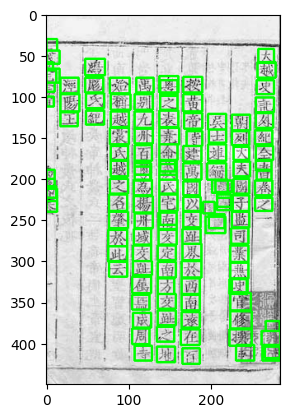

In [4]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("wb_localization_dataset/images/test/DVSKTT_ngoai_I_1a.jpg")

# Make a prediction
results = model.predict(source=img, save=False, stream=True)

# Visualize the results
for result in results:
    boxes = result.boxes  # Bounding box predictions
    print(f"Number of detected objects: {len(boxes)}")
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box

    # Display the image with bounding boxes
    plt.imshow(img)